In [1]:
''' 
NCAR/UCAR training material
Questions? Contact: A. Kootz akootz@ucar.edu
'''
pass

In [2]:
''' 
show motivational example here
Where using an object over just a variable containing data is a good,
numpy arrays, Xarrays are all objects (BUT DO NOT ALWAYS BEHAVE LIKE OBJECTS)

'''

' \nshow motivational example here\nWhere using an object over just a variable containing data is a good,\nnumpy arrays, Xarrays are all objects (BUT DO NOT ALWAYS BEHAVE LIKE OBJECTS)\n\n'

In [3]:
'''
Into to Objects: 
classes in python are Objects
Objects are created with the special method '__init__()'
Objects can inherit from other objects
Objects can have other objects as properties
'''

"\nInto to Objects: \nclasses in python are Objects\nObjects are created with the special method '__init__()'\nObjects can inherit from other objects\nObjects can have other objects as properties\n"

In [4]:
# Terms:

# Function, a callable peice of code that usually takes and input and returns an output
# example:
def function(input):
  output = input
  return output

# Object, a persistent data structure that usually has properties and methods. Python uses the keyword 'class' to define objects.
# example:
class Object():

# Property, a variable associated with an object. if not defined within __init__ the value is available before instantiation.
# example:
  property = 'some value that exists before instantiation'

# Method, similar to functions though they usually modify an object's properties.
# example:
  def __init__(self): # __init__ is a special method for instantiating Objects.
    self.property = 'some default value that exists after instantiation'

  def method(self, new_property_value): # methods usually pass in the 'self' keyword, which is a handle to the currently active object
    self.property = new_property_value

In [5]:
print(Object.property)

instance1 = Object() # this creates a new object and implicitly calls __init__(self):
print(instance1.property)

instance1.method('we have now changed the property')
print(instance1.property)

print(Object.property)

some value that exists before instantiation
some default value that exists after instantiation
we have now changed the property
some value that exists before instantiation


In [6]:
'''
make a forecast object, with methods for:
specialized forecast, ex: east wind at surface in boulder for paragliding.
'''


'\nmake a forecast object, with methods for:\nspecialized forecast, ex: east wind at surface in boulder for paragliding.\n'

In [20]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from siphon.catalog import get_latest_access_url
from siphon.ncss import NCSS
import xarray as xr
import time

class HRRRCast():
    def __init__(self, lat, lon):
        self.var = [
                    'u-component_of_wind_height_above_ground',
                    'v-component_of_wind_height_above_ground',
                    'Temperature_height_above_ground',
                    'u-component_of_wind_isobaric',
                    'v-component_of_wind_isobaric',
                    'Temperature_isobaric',
                    'Geopotential_height_surface',
                    'Total_cloud_cover_entire_atmosphere',
                    'Convective_available_potential_energy_surface',
                    'Hourly_Maximum_of_Upward_Vertical_Velocity_in_the_lowest_400hPa_pressure_difference_layer_1_Hour_Maximum',
                    'Surface_lifted_index_isobaric_layer',
                    ]
        self.north =lat+1
        self.south =lat-1
        self.east=lon+1
        self.west=lon-1
        self.latest_access_url = None
        self.nc = None
    
    def update(self):
#         latest_access_url = get_latest_access_url("http://thredds.ucar.edu/thredds/catalog/grib/NCEP/HRRR/CONUS_2p5km/catalog.xml", "NetcdfSubset")
#         if self.latest_access_url == latest_access_url:
#             return
#         self.latest_access_url = latest_access_url
#         ncss = NCSS(latest_access_url)
#         query = ncss.query()
#         query.accept('netcdf4')
#         query.all_times()
#         query.lonlat_box(north=self.north, south=self.south, east=self.east, west=self.west)
#         query.variables(frozenset(self.var))
#         open('temp.nc4', 'wb').write(ncss.get_data_raw(query))
        self.nc = xr.load_dataset('temp.nc4')
        
    def forecast(self, var_index = -1, time_index = 1, barbs = True, streamlines = False, grid_size = 1):
        nc = self.nc
        var = self.var
        nctime = 'time'
        ncvar = nc[var[var_index]]
        ncname = ncvar.name
        
        #km to meters conversion
        x = ncvar.x.data*1000.
        y = ncvar.y.data*1000.
                 
        grid = nc[ncvar.grid_mapping]
        crs = ccrs.LambertConformal(
                                    central_longitude=grid.longitude_of_central_meridian, 
                                    central_latitude=grid.latitude_of_projection_origin, 
                                    standard_parallels=(grid.latitude_of_projection_origin,grid.standard_parallel), 
                                    globe=ccrs.Globe(ellipse='sphere', semimajor_axis=grid.earth_radius)
                                    )
                 
        fig = plt.figure(figsize=(10,10), dpi=200)
        ax = plt.axes(projection=ccrs.PlateCarree())
        mesh = ax.pcolorfast(x,y,ncvar[time_index,::].data.squeeze(), transform=crs, cmap='coolwarm')

        if barbs: ax.barbs(x,y,nc[var[0]][time_index,1,::].data.squeeze(),nc[var[1]][time_index,1,::].data.squeeze(), transform=crs, length=3, linewidth=0.2)
        if streamlines: ax.streamplot(x,y,nc[var[0]][time_index,0,::].data.squeeze(),nc[var[1]][time_index,0,::].data.squeeze(), transform=crs, density = 5, color='grey', arrowsize=0.5, linewidth= 0.5)
            
        ax.scatter(-105.300, 40.056, c='black', s=8)
        ax.text(-105.300, 40.056, ' Wonderland', size=8)
        ax.scatter(-105.245, 39.737, c='black', s=8)
        ax.text(-105.245, 39.737, ' Lookout', size=8)
        # ax.scatter(-105.282, 40.133, c='black', s=8)
        # ax.text(-105.282, 40.13, ' Altona', size=8)
        # ax.scatter(-105.271, 40.224, c='black', s=8)
        # ax.text(-105.271, 40.224, ' Lyons', size=8)
        # ax.scatter(-105.419, 40.026, c='black', s=8)
        # ax.text(-105.419, 40.026, ' Sugarloaf', size=8)
        
        gl = ax.gridlines(draw_labels=True, color = 'black', linewidth=0.5)
        gl.xlocator = mticker.FixedLocator(np.arange(self.west,self.east+grid_size,grid_size))
        gl.ylocator = mticker.FixedLocator(np.arange(self.south,self.north+grid_size,grid_size))
        gl.top_labels = False
        gl.right_labels = False
        
        plt.xlim([self.west,self.east])
        plt.ylim([self.south, self.north])
        plt.colorbar(mesh, shrink=0.8)
        plt.title(str(nc[nctime].data[time_index])[:-16] + ' ' + ncname[:42]);
        plt.show()

In [17]:
hr = HRRRCast(40,-105)

In [18]:
hr.update()
hr.var

['u-component_of_wind_height_above_ground',
 'v-component_of_wind_height_above_ground',
 'Temperature_height_above_ground',
 'u-component_of_wind_isobaric',
 'v-component_of_wind_isobaric',
 'Temperature_isobaric',
 'Geopotential_height_surface',
 'Total_cloud_cover_entire_atmosphere',
 'Convective_available_potential_energy_surface',
 'Hourly_Maximum_of_Upward_Vertical_Velocity_in_the_lowest_400hPa_pressure_difference_layer_1_Hour_Maximum',
 'Surface_lifted_index_isobaric_layer']

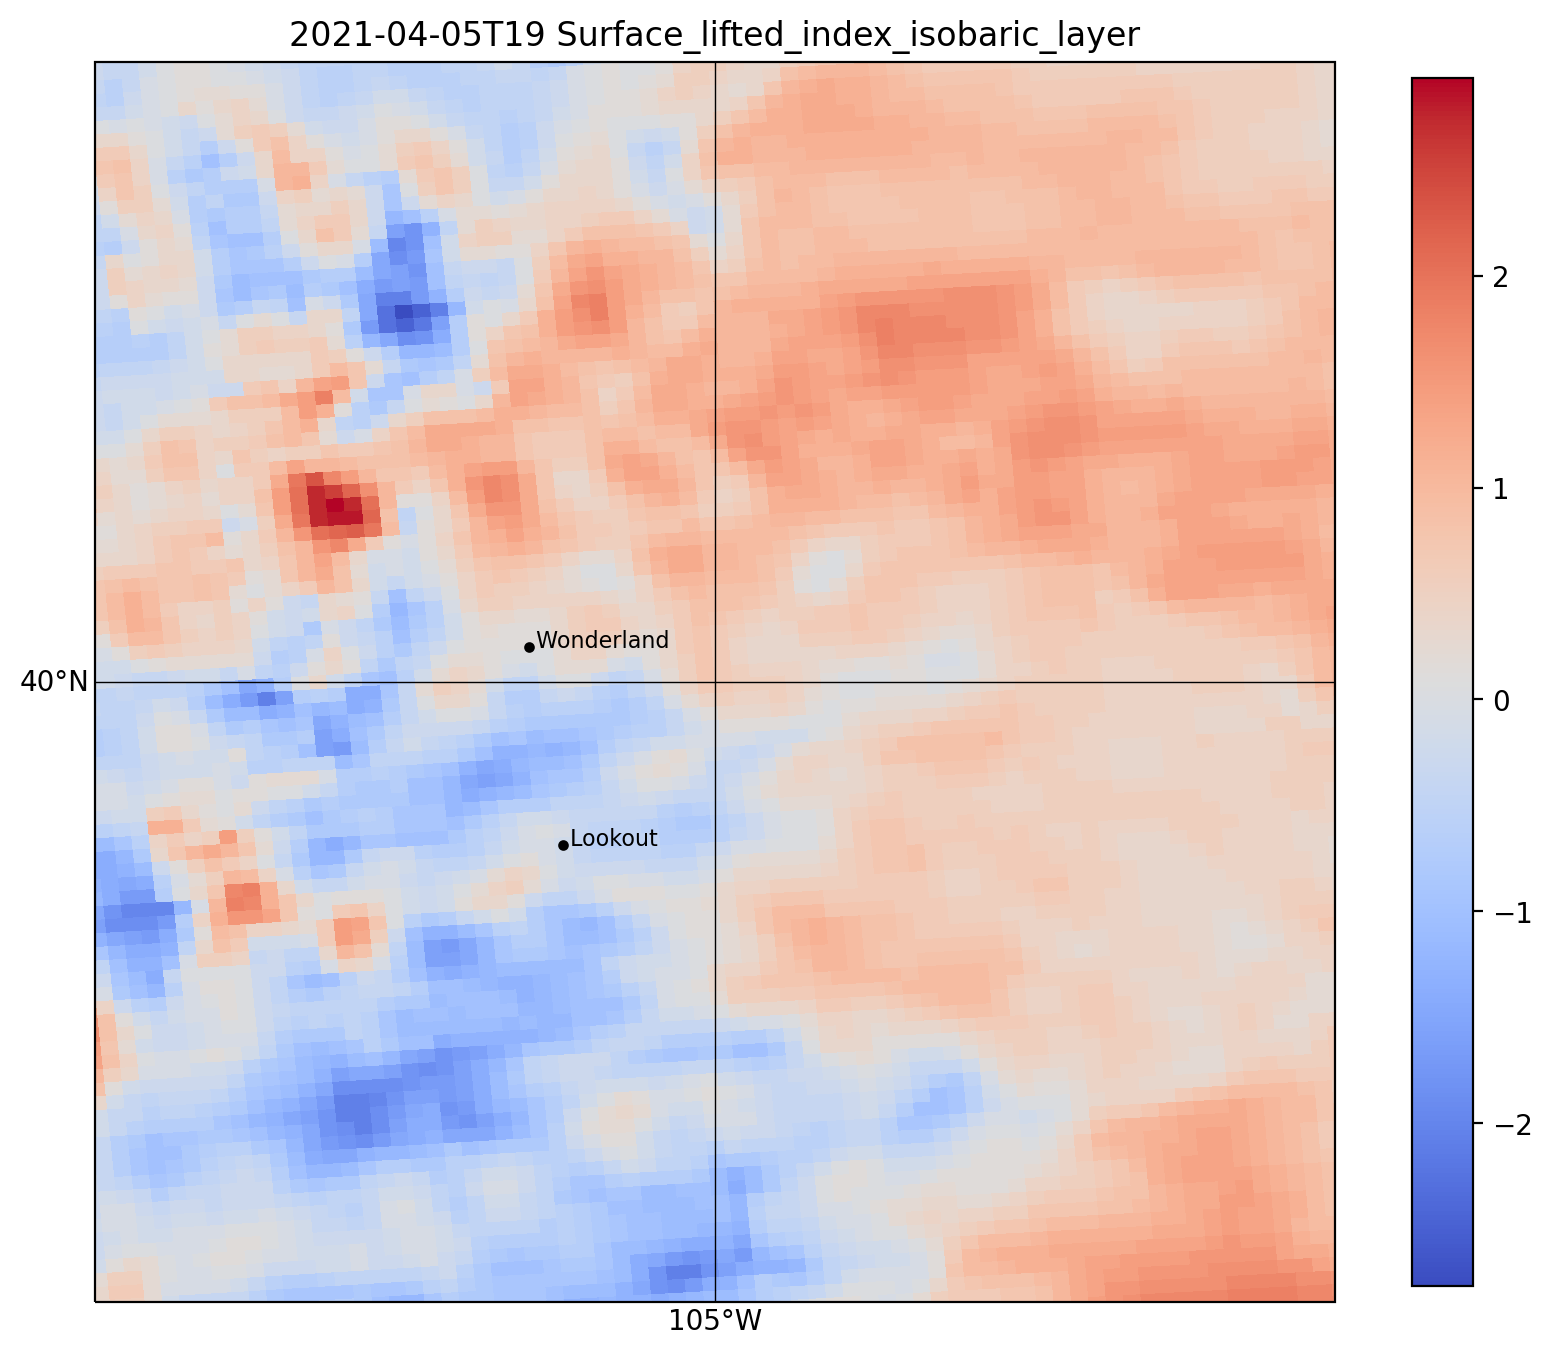

In [19]:
hr.forecast(var_index = -1)